# Visualization of the fitted curves 

# a)

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
X_train = train['Feature']
y_train = np.array(train[' Label'])
X_test = test['Feature']
y_test = np.array(test[' Label'])

In [4]:
def hypothesis_function(x_temp, theta):
    h = np.matmul(x_temp, theta)
    return h

def grad_cost_function(x_train, y_train, theta, k):
    m = len(y_train)
    h = hypothesis_function(x_train, theta)
    grad_cost = np.array([np.sum((h - y_train)*x_train[:, i])*(1/m) for i in range(k+1)])
    return grad_cost

def gradient_descent(x_train, y_train, alpha, N, theta, k):
    for _ in range(N):
        grad_cost = grad_cost_function(x_train, y_train, theta, k)
        temp = alpha * grad_cost
        theta = theta - temp
    return theta

def predict_train(x_train, y_train, alpha, N, k):
    
    theta = np.array([0 for i in range(k+1)])
    theta = gradient_descent(x_train, y_train, alpha, N, theta, k)
    y_train_predicted = hypothesis_function(x_train, theta)
    return y_train_predicted

def predict_test(X_train, y_train, X_test, alpha, N, k):
    x_train = np.array([X_train**i for i in range(k+1)]).T
    x_test = np.array([X_test**i for i in range(k+1)]).T
    theta = np.array([0 for i in range(k+1)])
    theta_trained = gradient_descent(x_train, y_train, alpha, N, theta, k)
    y_test_pred = hypothesis_function(x_test, theta_trained)
    return y_test_pred

def squared_error(X_train, X_test, y_train, y_test, alpha, N, k):
    x_train = np.array([X_train**i for i in range(k+1)]).T
    x_test = np.array([X_test**i for i in range(k+1)]).T
    theta = np.array([0 for i in range(k+1)])
    theta = gradient_descent(x_train, y_train, alpha, N, theta, k)
    h_train = hypothesis_function(x_train, theta)
    m_train = len(y_train)
    J_train = (1/(2*m_train)) * np.sum((h_train - y_train)**2)
    h_test = hypothesis_function(x_test, theta)
    m_test = len(y_test)
    J_test = (1/(2*m_test)) * np.sum((h_test - y_test)**2)
    return (J_train, J_test)

def plot_train(X_train, y_train, alpha, N, k):
    x_train = np.array([X_train**i for i in range(k+1)]).T
    plt.scatter(X_train, y_train)
    plt.scatter(X_train, predict_train(x_train, y_train, alpha, N, k))
    
def plot_test(X_train, y_train, X_test, y_test, alpha, N, k):    
    plt.scatter(X_test, y_test)
    y_pred = predict_test(X_train, y_train, X_test, alpha, N, k)
    plt.scatter(X_test, y_pred)

## Fitted Curves 

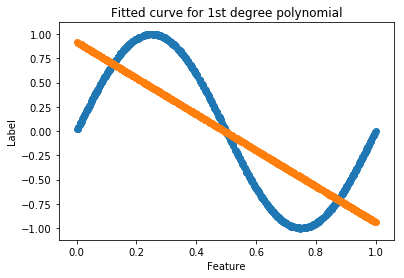

In [5]:
plot_train(X_train, y_train, 0.05, 100000, 1)
plt.title('Fitted curve for 1st degree polynomial')
plt.xlabel('Feature')
plt.ylabel('Label')

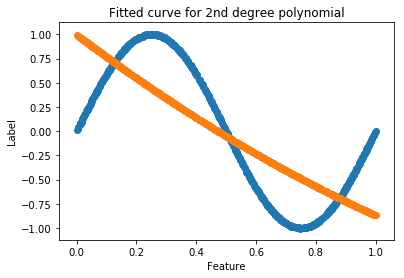

In [6]:
plot_train(X_train, y_train, 0.05, 100000, 2)
plt.title('Fitted curve for 2nd degree polynomial')
plt.xlabel('Feature')
plt.ylabel('Label')

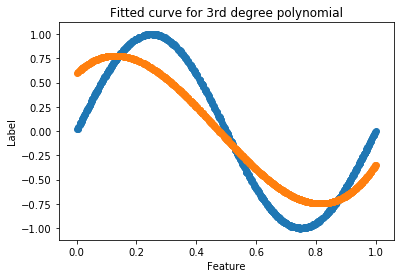

In [7]:
plot_train(X_train, y_train, 0.05, 100000, 3)
plt.title('Fitted curve for 3rd degree polynomial')
plt.xlabel('Feature')
plt.ylabel('Label')

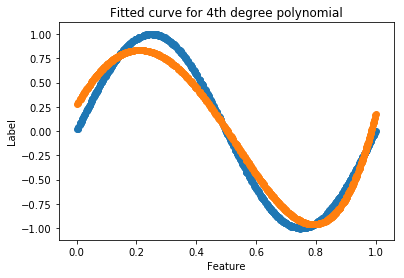

In [8]:
plot_train(X_train, y_train, 0.05, 100000, 4)
plt.title('Fitted curve for 4th degree polynomial')
plt.xlabel('Feature')
plt.ylabel('Label')

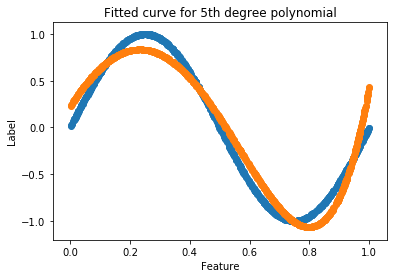

In [9]:
plot_train(X_train, y_train, 0.05, 100000, 5)
plt.title('Fitted curve for 5th degree polynomial')
plt.xlabel('Feature')
plt.ylabel('Label')

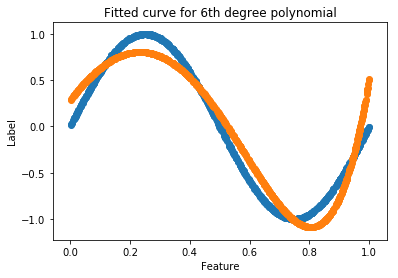

In [10]:
plot_train(X_train, y_train, 0.05, 100000, 6)
plt.title('Fitted curve for 6th degree polynomial')
plt.xlabel('Feature')
plt.ylabel('Label')

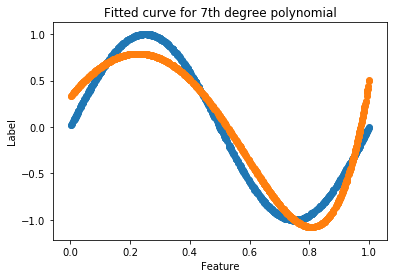

In [11]:
plot_train(X_train, y_train, 0.05, 100000, 7)
plt.title('Fitted curve for 7th degree polynomial')
plt.xlabel('Feature')
plt.ylabel('Label')

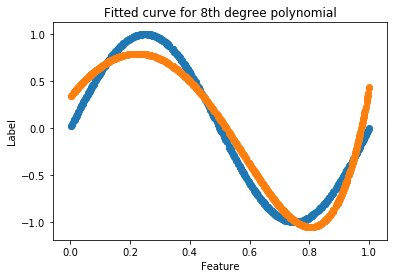

In [12]:
plot_train(X_train, y_train, 0.05, 100000, 8)
plt.title('Fitted curve for 8th degree polynomial')
plt.xlabel('Feature')
plt.ylabel('Label')

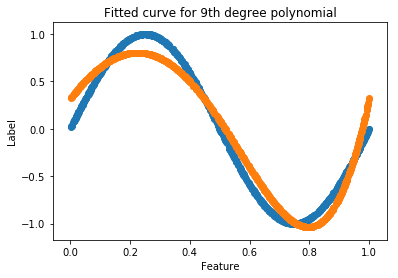

In [13]:
plot_train(X_train, y_train, 0.05, 100000, 9)
plt.title('Fitted curve for 9th degree polynomial')
plt.xlabel('Feature')
plt.ylabel('Label')

# b) Training error and testing error

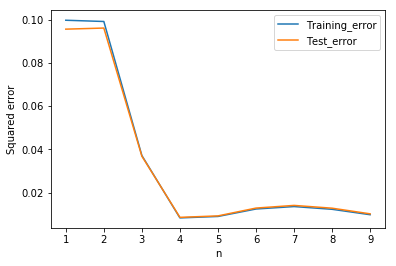

In [14]:
error_train = []
error_test = []
for i in range(1, 10):
    J = squared_error(X_train, X_test, y_train, y_test, 0.05, 100000, i)
    error_train.append(J[0])
    error_test.append(J[1])
n = [i for i in range(1,10)]    
plt.plot(n, error_train, label = 'Training_error')
plt.plot(n, error_test, label = 'Test_error')
plt.xlabel('n')
plt.ylabel('Squared error')
plt.legend()

# Most suitable value of n

## We can clearly see from the graph that the most suitable value of n for this dataset is n = 4. 


### On both training and testing dataset, as the value of n increases, the squared error decreases, reaches a minimum and then increases. 

### This local minima occurs at n = 4, thus we can say that the most suitable value of n for this data is n = 4

### Also the error is maximum for n = 1 as in that case, both the training and testing error are maximum.

#######################################################################################################################